In [54]:
import pandas as pd

found_bldgs = pd.read_csv('/Users/apando/school/cs230/project/datasets/test_set_building_bboxes/preds_test_noaa_geo.txt', names=['tile', 'coord1', 'coord2', 'coord3', 'coord4'], index_col=False)
print(found_bldgs.head())

found_bldgs.ix[0]['tile'].split('/')[-1].split('.')[-2]

                                                tile     coord1     coord2  \
0  /host/datasets/maria/noaa/tiles/20170926aC0662... -66.442082  17.980087   
1  /host/datasets/maria/noaa/tiles/20170926aC0662... -66.442347  17.979984   
2  /host/datasets/maria/noaa/tiles/20170926aC0662... -66.442661  17.979528   
3  /host/datasets/maria/noaa/tiles/20170926aC0662... -66.441933  17.980665   
4  /host/datasets/maria/noaa/tiles/20170926aC0662... -66.442243  17.980548   

      coord3     coord4  
0 -66.441871  17.979878  
1 -66.442152  17.979794  
2 -66.442505  17.979381  
3 -66.441812  17.980509  
4 -66.442094  17.980399  


/Users/apando/miniconda3/envs/disaster-detection/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


'20170926aC0662700w180000n_15_06'

In [11]:
test_bldgs = pd.read_csv('/Users/apando/school/cs230/project/datasets/test_set_building_bboxes/test_building_images.txt', sep='_', names=['coord', 'tile1', 'tile2', 'tile3', 'dmg'], index_col=False)

test_bldgs.head()

,coord,tile1,tile2,tile3,dmg
0,"-65.42709489999999,18.13285305",20170924aC0652700w180900n,13,17,des.jpeg
1,"-65.42730967871594,18.133237155323837",20170924aC0652700w180900n,13,17,des.jpeg
2,"-65.42850069684863,18.134681830023606",20170924aC0652700w180900n,12,16,des.jpeg
3,"-65.42906042886324,18.135274087006422",20170924aC0652700w180900n,11,16,nd.jpeg
4,"-65.43006025000001,18.14934525",20170924aC0652700w180900n,1,15,des.jpeg


In [17]:
test_bldgs['tilename'] = ""
test_bldgs['tile2int'] = test_bldgs['tile2'].map(lambda x: str(x))
test_bldgs['tile3int'] = test_bldgs['tile3'].map(lambda x: str(x))

In [18]:
for row in test_bldgs.iterrows():
    test_bldgs['tilename'] = test_bldgs['tile1'] + '_' + test_bldgs['tile2int'] + '_' + test_bldgs['tile3int']
    
test_bldgs.head()

,coord,tile1,tile2,tile3,dmg,tilename,tile2int,tile3int
0,"-65.42709489999999,18.13285305",20170924aC0652700w180900n,13,17,des.jpeg,20170924aC0652700w180900n_13_17,13,17
1,"-65.42730967871594,18.133237155323837",20170924aC0652700w180900n,13,17,des.jpeg,20170924aC0652700w180900n_13_17,13,17
2,"-65.42850069684863,18.134681830023606",20170924aC0652700w180900n,12,16,des.jpeg,20170924aC0652700w180900n_12_16,12,16
3,"-65.42906042886324,18.135274087006422",20170924aC0652700w180900n,11,16,nd.jpeg,20170924aC0652700w180900n_11_16,11,16
4,"-65.43006025000001,18.14934525",20170924aC0652700w180900n,1,15,des.jpeg,20170924aC0652700w180900n_1_15,1,15


In [27]:
# Remove missing tiles from test set
missing_tiles = pd.read_csv('/Users/apando/school/cs230/project/datasets/test_set_building_bboxes/missing_tiles.txt', names=['tilename'])



In [28]:
missing_tiles = missing_tiles.drop_duplicates()
missing_tiles['missing'] = True
print(len(missing_tiles))

24


In [37]:
ftest_bldgs = test_bldgs.join(missing_tiles, how='left', lsuffix='_all', rsuffix='_missing')

In [38]:
ftest_bldgs = ftest_bldgs[ftest_bldgs['missing'] != True]
print(len(ftest_bldgs))
print(len(test_bldgs))

360
384


In [39]:
ftest_bldgs.head()

,coord,tile1,tile2,tile3,dmg,tilename_all,tile2int,tile3int,tilename_missing,missing
24,"-65.7074567,18.185482450000002",20170924aC0654330w181200n,11,13,des.jpeg,20170924aC0654330w181200n_11_13,11,13,NaN,NaN
25,"-65.7076868560244,18.240986233333334",20170925aC0654330w181500n,7,13,des.jpeg,20170925aC0654330w181500n_7_13,7,13,NaN,NaN
26,"-65.70797463319161,18.205437250510393",20170926bC0654330w181330n,15,13,nd.jpeg,20170926bC0654330w181330n_15_13,15,13,NaN,NaN
27,"-65.70901835,18.237228249999998",20170925aC0654330w181500n,10,12,des.jpeg,20170925aC0654330w181500n_10_12,10,12,NaN,NaN
28,"-65.71025535000001,18.18652365",20170924aC0654330w181200n,10,11,des.jpeg,20170924aC0654330w181200n_10_11,10,11,NaN,NaN


In [56]:
import geopandas as gpd
import os
import pandas as pd
import rasterio
import shapely

In [57]:
found_bldgs = pd.read_pickle('/Users/apando/school/cs230/project/datasets/test_set_building_bboxes/test_noaa_predictions.pkl')

In [65]:
print(len(found_bldgs))
found_bldgs.head()

300


,tile_name,left,top,right,bottom,geometry
0,tiles/20170926aC0662700w180000n_15_06.tif,-66.442082,17.980087,-66.441871,17.979878,POLYGON ((-66.44187130206738 17.98008691093576...
1,tiles/20170926aC0662700w180000n_15_06.tif,-66.442347,17.979984,-66.442152,17.979794,POLYGON ((-66.44215247884873 17.97998384143492...
2,tiles/20170926aC0662700w180000n_15_06.tif,-66.442661,17.979528,-66.442505,17.979381,"POLYGON ((-66.4425051535314 17.97952770719294,..."
3,tiles/20170926aC0662700w180000n_15_06.tif,-66.441933,17.980665,-66.441812,17.980509,POLYGON ((-66.44181196402762 17.98066490232297...
4,tiles/20170926aC0662700w180000n_15_06.tif,-66.442243,17.980548,-66.442094,17.980399,POLYGON ((-66.44209406830417 17.98054819615188...


In [66]:
# Find the intersection between found buildings and test set
print(len(test_bldgs[test_bldgs['tilename'] == '20170926aC0662700w180000n_15_06']))


0


121


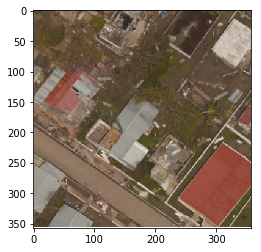

tiles/20170926aC0662700w180000n_15_06.tif


In [63]:
import random
from rasterio.mask import mask
from rasterio import plot
from shapely.geometry import Point

i = int(random.random()*len(found_bldgs))
print(i)
#i = 17492
row = found_bldgs.iloc[i]
tname = row['tile_name'].split('/')[1]

with rasterio.open('/Users/apando/school/cs230/project/datasets/hurricane_maria/post_event/noaa/tiles/' + tname) as src:
    building = row['geometry']
    building_center = Point(building.centroid.x, building.centroid.y)
    p = building_center.buffer(0.00024, cap_style=3).envelope
    out_img, out_transform = mask(src, [p], crop=True)
    plot.show(out_img)
    
    out_meta = src.meta.copy()
    
    # Save the resulting raster, as a 128x128 image
    out_meta.update({
        "driver": "JPEG",
        "height": 128,
        "width": 128,
        "transform": out_transform
    })
    
 #   with rasterio.open('/Users/apando/Downloads/test.jpeg', 'w', **out_meta) as dest:
  #      dest.write(out_img)
    
print(row['tile_name'])

In [67]:
# Crop out building from the tile, and save it in a separate file
# as a 128x128 px image.

# Hyperparameters here are:
#     - image size
#     - buffer around the building

import numpy as np
from rasterio.mask import mask

TILE_DIR = '/Users/apando/school/cs230/project/datasets/hurricane_maria/post_event/noaa/tiles/'
BASE_DIR = '/Users/apando/school/cs230/project/datasets/test_set_building_bboxes/found_crops/'

for _, row in found_bldgs.iterrows():
    building = row['geometry']
    tname = row['tile_name'].split('/')[1]
    x, y = building.centroid.x, building.centroid.y
    building_center = Point(x, y)
    with rasterio.open(TILE_DIR + tname) as src:
        # Add a small square buffer to the building polygon's centroid before cropping.
        p = building_center.buffer(0.00024, cap_style=3).envelope
        out_img, out_transform = mask(src, [p], crop=True)
    out_meta = src.meta.copy()
    
    # Save the resulting raster, as a 128x128 image
    out_meta.update({
        "driver": "JPEG",
        "height": 128,
        "width": 128,
        "transform": out_transform
    })  
    
    # Preserve tile name in case there's multiple images for 1 building (don't overwrite)
    with rasterio.open(BASE_DIR + '{0},{1}-{2}.jpeg'.format(x, y, tname), 'w', **out_meta) as dest:
        dest.write(out_img)